In [1]:
import glob

In [2]:
data_dir='/sdf/data/ad/ard-online/Simulations/FACET-II_Injector_Gaussian/Archive/*'



In [3]:
files=glob.glob(data_dir)

In [4]:
len(files)

845093

In [5]:
settings=['SOL10111:solenoid_field_scale','CQ10121:b1_gradient','SQ10122:b1_gradient',
          'QA10361:b1_gradient','QA10371:b1_gradient','QE10425:b1_gradient',
    'QE10441:b1_gradient',
    'QE10511:b1_gradient',
    'QE10525:b1_gradient',
    'L0AF_phase:theta0_deg',
    'L0AF_scale:rf_field_scale',
    'L0BF_phase:theta0_deg',
    'L0BF_scale:rf_field_scale',
    'GUNF:rf_field_scale',
    'GUNF:theta0_deg']
    # 'distgen:total_charge',
    # 'distgen:r_dist:sigma_xy:value',
    # 'distgen:r_dist:truncation_radius:value',
    # 'distgen:start:MTE:value',
    # 'distgen:t_dist:sigma_t:value']

In [6]:
I=Impact()
I.load_archive(files[0])
print(I['SOL10111:solenoid_field_scale'])
print(np.std(I['particles']['initial_particles']['x']))
print(np.std(I['particles']['initial_particles']['t']))
vars(I['particles']['initial_particles'])

-0.2329333588708664
0.0009567021828701534
1.0005499321899506e-12


{'_settable_array_keys': ['x',
  'px',
  'y',
  'py',
  'z',
  'pz',
  't',
  'status',
  'weight'],
 '_settable_scalar_keys': ['species'],
 '_settable_keys': ['x',
  'px',
  'y',
  'py',
  'z',
  'pz',
  't',
  'status',
  'weight',
  'species'],
 '_data': {'x': array([0.00073642, 0.00157952, 0.00118366, ..., 0.00145524, 0.00105394,
         0.00186152]),
  'px': array([ -15.10565762,  154.42758807,  385.97780028, ...,  330.3393964 ,
         -453.10486948, -187.01151785]),
  'y': array([ 2.56223321e-06,  1.01617845e-05,  1.13895353e-05, ...,
         -1.34385323e-05, -6.35586655e-06, -5.58503303e-06]),
  'py': array([ 206.51164295,  382.16951763, -569.99611155, ..., -675.34386208,
         -321.87287161, -166.04979895]),
  'z': array([0., 0., 0., ..., 0., 0., 0.]),
  'pz': array([419.27936964, 285.20604427, 187.54406978, ..., 165.15885117,
         256.78424722, 374.70578762]),
  't': array([-1.90003926e-12, -2.91005776e-12, -3.86410177e-12, ...,
         -3.58419325e-12, -2.01676908

In [7]:
# %%time
# Nlist=[]
# for file in files:
#     I=Impact()
#     I.load_archive(files[0])
#     I['particles']['PR10571']
#     Nlist.append(len(I['particles']['PR10571']['x']))
# Nlist=np.array(Nlist)    

In [8]:
I['output']['stats']['norm_emit_x'][-1]

0.00013565688

In [9]:
I['output']['run_info']['start_time']

1718783108.7448158

In [18]:
def calc_N(file):
    # print(file)
    I=Impact()
    try:
        I.load_archive(file)
    except:
        N=float('Nan')
        stdx=float('Nan')
        stdy=float('Nan')
        N241=float('Nan')
        s=float('Nan')
        normemit=float('Nan')
        t=float('Nan')
        init=float('Nan')
        return N,stdx,stdy,s,N241,normemit,t,init
    s={}
    try:
        N=len(I['particles']['PR10571']['x'])
        stdx=np.std(I['particles']['PR10571']['x'])
        stdy=np.std(I['particles']['PR10571']['y'])
        normemit=I['output']['stats']['norm_emit_x'][-1]
        t=I['output']['run_info']['start_time']
        
        
        
    except:
        N=0
        stdx=float('NaN')
        stdy=float('NaN')
        normemit=float('Nan')
        t=float('Nan')
    init={}
    try:
        init['stdx']=np.std(I['particles']['initial_particles']['x'])
        init['stdy']=np.std(I['particles']['initial_particles']['y'])
        init['stdt']=np.std(I['particles']['initial_particles']['t'])
        init['stdpx']=np.std(I['particles']['initial_particles']['px'])
        init['stdpy']=np.std(I['particles']['initial_particles']['py'])
        init['stdpz']=np.std(I['particles']['initial_particles']['pz'])
    except:
        init['stdx']=float('NaN')
        init['stdy']=float('NaN')
        init['stdt']=float('NaN')
        init['stdpx']=float('NaN')
        init['stdpy']=float('NaN')
        init['stdpz']=float('NaN')
    try:
        N241=len(I['particles']['PR10241']['x'])
    except:
        N241=0

    for setting in settings:
        s[setting]=I[setting]

    try:
        s['charge']=I['particles']['PR10571']['weight'][0]*2e5
    except:
        s['charge']=np.sum(I['initial_particles']['weight'])
    return N,stdx,stdy,s,N241,normemit,t,init

In [19]:
# def calc_N(file):
#     # print(file)
#     I=Impact()
#     I.load_archive(file)
#     N=len(I['particles']['PR10571']['x'])
#     return N

In [20]:
filestest=files[0:]

len(filestest)

845093

In [21]:
Nlist,stdx,stdy,s,N241,normemit,t,init =calc_N(files[0])

In [22]:
N241

2000

In [23]:
import concurrent

In [24]:
%%time
with concurrent.futures.ProcessPoolExecutor() as pool:
    Nlist,stdx,stdy,s,N241,normemit,t,init = zip(*pool.map(calc_N, filestest))

CPU times: user 6min 46s, sys: 53.7 s, total: 7min 39s
Wall time: 16min 9s


In [25]:
N=[]
for item in Nlist:
    try:
        N.append(int(item))
    except:
        N.append(0)

In [26]:
N2=[]
for item in N241:
    try:
        N2.append(int(item))
    except:
        N2.append(0)

In [27]:
len(s)

845093

(array([124989.,  47888.,  36099.,  31814.,  29572.,  30134.,  33949.,
         53010.,  86225., 371412.]),
 array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.,
        1800., 2000.]),
 <BarContainer object of 10 artists>)

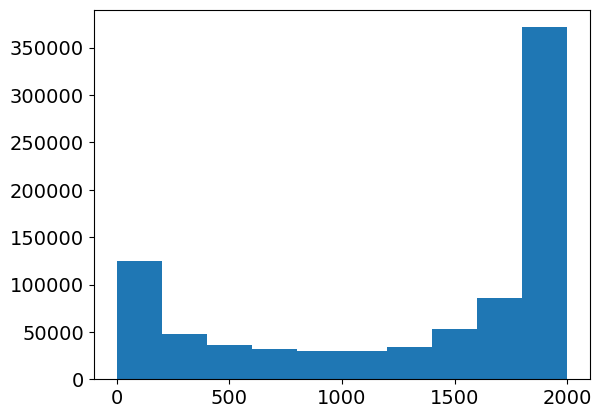

In [28]:
plt.hist(np.array(Nlist))

In [29]:
idx2=(np.array(Nlist)>1500)


In [30]:
idx1=(np.array(normemit)<2e-5)

In [31]:
np.sum(idx1 & idx2)

383813

In [32]:
max(N2)

2000

In [33]:
ts=np.array(t)
iii=np.argsort(ts)
idx=(idx1 & idx2)

tt=ts[iii]
idxs=idx[iii]

In [34]:
len(tt)
len(ts)

845093

Text(0, 0.5, 'Valid Samples')

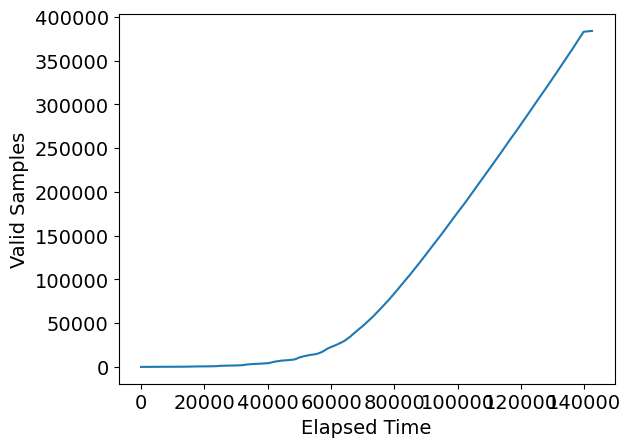

In [35]:
plt.plot(tt-min(tt),np.cumsum(idxs))
plt.xlabel('Elapsed Time')
plt.ylabel('Valid Samples')


In [36]:
idx=(idx1 & idx2)

(array([1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 3.40000e+01, 8.45058e+05]),
 array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.,
        1800., 2000.]),
 <BarContainer object of 10 artists>)

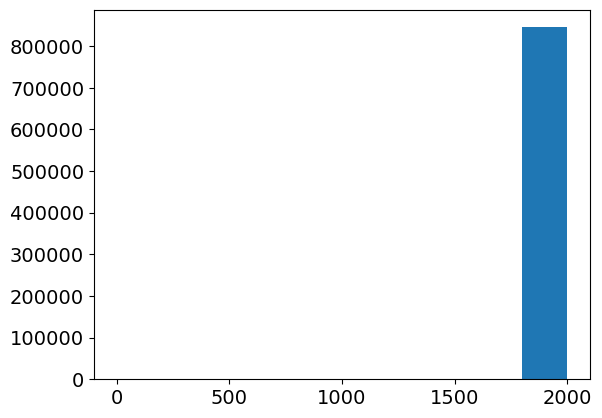

In [37]:
plt.hist(np.array(N2))

In [38]:
sum(np.array(N2)>=190000)

0

In [42]:
settingsRead=pd.DataFrame(s)

AttributeError: 'float' object has no attribute 'keys'

In [43]:
settingsRead.head()

NameError: name 'settingsRead' is not defined

In [44]:
q=np.array(settingsRead['charge'])

NameError: name 'settingsRead' is not defined

In [45]:
q

NameError: name 'q' is not defined

In [40]:
plt.scatter(q,N2)

NameError: name 'q' is not defined

In [41]:
VCL=np.pi* 8.854e-12 * np.array(settingsRead['GUNF:rf_field_scale']) * np.cos(np.array(settingsRead['GUNF:theta0_deg'])*np.pi/180) * (2.808e-3)**2

NameError: name 'settingsRead' is not defined

In [ ]:
plt.scatter(q/VCL,N2)

In [ ]:
VCL

In [ ]:
q

In [ ]:
plt.scatter(np.array(settingsRead['SOL10111:solenoid_field_scale']),N2)

In [ ]:
plt.scatter(np.array(settingsRead['CQ10121:b1_gradient']),N2)

In [ ]:
plt.scatter(np.array(settingsRead['SQ10122:b1_gradient']),N2)

In [ ]:
idx1=np.array(settingsRead['SOL10111:solenoid_field_scale'])>-0.32 
idx2=np.array(settingsRead['SOL10111:solenoid_field_scale'])<-0.2

idx3=np.array(settingsRead['CQ10121:b1_gradient'])>-0.2 
idx4=np.array(settingsRead['CQ10121:b1_gradient'])<0.2

idx5=np.array(settingsRead['SQ10122:b1_gradient'])>-0.2 
idx6=np.array(settingsRead['SQ10122:b1_gradient'])<0.2

idx=idx1&idx2&idx5&idx6&idx3&idx4

plt.scatter(q[idx]/VCL[idx],np.array(N2)[idx])

In [ ]:
N571=np.array(Nlist)/np.array(N2)

In [ ]:
plt.scatter(settingsRead['QA10361:b1_gradient'],N571)

In [ ]:
plt.scatter(settingsRead['QA10371:b1_gradient'],N571)

In [ ]:
plt.scatter(settingsRead['QE10425:b1_gradient'],N571)

In [ ]:
plt.scatter(settingsRead['QE10441:b1_gradient'],N571)

In [ ]:
plt.scatter(settingsRead['QE10511:b1_gradient'],N571)

In [ ]:
plt.scatter(settingsRead['QE10525:b1_gradient'],N571)

In [ ]:
plt.scatter(settingsRead['L0AF_phase:theta0_deg'],N571)

In [ ]:
plt.scatter(settingsRead['L0AF_scale:rf_field_scale'],N571)

In [ ]:
plt.scatter(settingsRead['L0BF_phase:theta0_deg'],N571)

In [ ]:
plt.scatter(settingsRead['L0BF_scale:rf_field_scale'],N571)

In [ ]:
idx1=np.array(settingsRead['QA10361:b1_gradient'])>-5
idx2=np.array(settingsRead['QA10361:b1_gradient'])<0

idx3=np.array(settingsRead['QA10371:b1_gradient'])>0
idx4=np.array(settingsRead['QA10371:b1_gradient'])<5

idx5=np.array(settingsRead['QE10425:b1_gradient'])>-10
idx6=np.array(settingsRead['QE10425:b1_gradient'])<0

idx7=np.array(settingsRead['QE10441:b1_gradient'])>0
idx8=np.array(settingsRead['QE10441:b1_gradient'])<10

idx9=np.array(settingsRead['QE10511:b1_gradient'])>0
idx10=np.array(settingsRead['QE10511:b1_gradient'])<10

idx11=np.array(settingsRead['QE10525:b1_gradient'])>-10
idx12=np.array(settingsRead['QE10525:b1_gradient'])<0

idx13=np.array(settingsRead['L0AF_phase:theta0_deg'])>-30
idx14=np.array(settingsRead['L0AF_phase:theta0_deg'])<30

idx15=np.array(settingsRead['L0AF_scale:rf_field_scale'])>28e6
idx16=np.array(settingsRead['L0AF_scale:rf_field_scale'])<33e6

idx17=np.array(settingsRead['L0BF_phase:theta0_deg'])>-30
idx18=np.array(settingsRead['L0BF_phase:theta0_deg'])<30

idx19=np.array(settingsRead['L0BF_scale:rf_field_scale'])>28e6
idx20=np.array(settingsRead['L0BF_scale:rf_field_scale'])<33e6

idx21=np.array(settingsRead['SOL10111:solenoid_field_scale'])>-0.32 
idx22=np.array(settingsRead['SOL10111:solenoid_field_scale'])<-0.2

idx23=np.array(settingsRead['CQ10121:b1_gradient'])>-0.2 
idx24=np.array(settingsRead['CQ10121:b1_gradient'])<0.2

idx25=np.array(settingsRead['SQ10122:b1_gradient'])>-0.2 
idx26=np.array(settingsRead['SQ10122:b1_gradient'])<0.2




idx=idx1&idx2&idx5&idx6&idx3&idx4&idx7&idx8*idx9&idx10&idx11&idx12&idx13&idx14&idx15&idx16&idx17&idx18&idx19&idx20&idx21&idx22&idx23&idx24&idx25&idx26

plt.scatter(np.array(settingsRead['QE10441:b1_gradient'])[idx],np.array(N571)[idx])
# idx7=np.array(settingsRead['QA10361:b1_gradient'])>-5
# idx8=np.array(settingsRead['QA10361:b1_gradient'])<5

# idx9=np.array(settingsRead['QA10371:b1_gradient'])>-5
# idx10=np.array(settingsRead['QA10371:b1_gradient'])<5

# idx11=np.array(settingsRead['QE10425:b1_gradient'])>-5
# idx12=np.array(settingsRead['QE10425:b1_gradient'])<5

In [ ]:
plt.scatter(np.array(settingsRead['QE10441:b1_gradient']),np.array(N571))

In [ ]:
idx1=np.array(settingsRead['QA10361:b1_gradient'])>-2
idx2=np.array(settingsRead['QA10361:b1_gradient'])<0

idx3=np.array(settingsRead['QA10371:b1_gradient'])>0
idx4=np.array(settingsRead['QA10371:b1_gradient'])<3

idx5=np.array(settingsRead['QE10425:b1_gradient'])>-5
idx6=np.array(settingsRead['QE10425:b1_gradient'])<0

idx7=np.array(settingsRead['QE10441:b1_gradient'])>0
idx8=np.array(settingsRead['QE10441:b1_gradient'])<6

idx9=np.array(settingsRead['QE10511:b1_gradient'])>0
idx10=np.array(settingsRead['QE10511:b1_gradient'])<7

idx11=np.array(settingsRead['QE10525:b1_gradient'])>-7
idx12=np.array(settingsRead['QE10525:b1_gradient'])<0

idx13=np.array(settingsRead['L0AF_phase:theta0_deg'])>-30
idx14=np.array(settingsRead['L0AF_phase:theta0_deg'])<30

idx15=np.array(settingsRead['L0AF_scale:rf_field_scale'])>28e6
idx16=np.array(settingsRead['L0AF_scale:rf_field_scale'])<33e6

idx17=np.array(settingsRead['L0BF_phase:theta0_deg'])>-30
idx18=np.array(settingsRead['L0BF_phase:theta0_deg'])<30

idx19=np.array(settingsRead['L0BF_scale:rf_field_scale'])>28e6
idx20=np.array(settingsRead['L0BF_scale:rf_field_scale'])<33e6

idx21=np.array(settingsRead['SOL10111:solenoid_field_scale'])>-0.28
idx22=np.array(settingsRead['SOL10111:solenoid_field_scale'])<-0.22

idx23=np.array(settingsRead['CQ10121:b1_gradient'])>-0.2 
idx24=np.array(settingsRead['CQ10121:b1_gradient'])<0.2

idx25=np.array(settingsRead['SQ10122:b1_gradient'])>-0.2 
idx26=np.array(settingsRead['SQ10122:b1_gradient'])<0.2




idx=idx1&idx2&idx5&idx6&idx3&idx4&idx7&idx8*idx9&idx10&idx11&idx12&idx13&idx14&idx15&idx16&idx17&idx18&idx19&idx20&idx21&idx22&idx23&idx24&idx25&idx26

plt.scatter(np.array(settingsRead['QE10441:b1_gradient'])[idx],np.array(N571)[idx])
# idx7=np.array(settingsRead['QA10361:b1_gradient'])>-5
# idx8=np.array(settingsRead['QA10361:b1_gradient'])<5

# idx9=np.array(settingsRead['QA10371:b1_gradient'])>-5
# idx10=np.array(settingsRead['QA10371:b1_gradient'])<5

# idx11=np.array(settingsRead['QE10425:b1_gradient'])>-5
# idx12=np.array(settingsRead['QE10425:b1_gradient'])<5

In [ ]:
np.max(N571)

In [ ]:
ii=np.argmax(N571)

In [ ]:
print(ii)

In [ ]:
settingsRead.iloc[ii]

In [ ]:
settingsRead.iloc[ii]['charge']